<a href="https://colab.research.google.com/github/merrymira/bkktrafficdata/blob/main/3_Modelling_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning in Automating Traffic Controller at the Congested Intersection in Urban Cities to enhance Traffic Flow


After data pre-processing, EDA, and feature engineering, the csv file is now ready but before for training with the following models, we need to calculate the Effective Green Interval and Cycle Length.

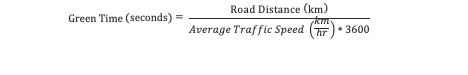


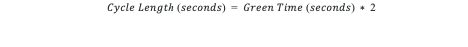

Model Selection:
  - Linear Regression
  - Random Forest
  - Desicion Tree
  - Polynomial Regression
  
**Note:** This work belongs to Marisara Satrulee, submitted on 1 June 2024 for the subject: 36123 Research Paper in Autumn 2024. For more information please contact dmarisara@gmail.com.
  
  
  

##Import neccessary libraries and packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
# prompt: read filenames from google drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/Data_Research/'

/content/gdrive/My Drive/Data_Research


In [4]:
!ls

bangkok.geojson		    merged_traffic_data.xlsx  Traffic_NoTranspose
data_Features_Engineer.csv  RoadTranslate.xlsx	      Traffic_Transpose


##Calculate Effective Green Interval and Cycle Length

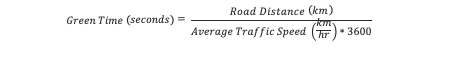

Load DataFrame as **df**

In [13]:
# prompt: create dataFrame that contain 'Crossroads' and 'Road' translation from Thai to English
df_orig = pd.read_csv('data_Features_Engineer.csv', index_col=0)

Call df.head()

In [14]:
df_orig.head()

,Date,Crossroads,Road,Lat,Long,Time_of_day,Time_range,Time_Record,Volume,Flow(vec/hr),Day,Lat_Road,Lon_Road,Distance,LOS,Avg. Traffic Speed,Avg Traffic Density
0,2023-01-03,Prannok,Itsaraphap,13.755575,100.47796,Afternoon,9-17,8,9189.0,1148.625,3,13.738327,100.485702,2.092193,LOS_C,91.245113,13.090703
1,2023-01-03,Prannok,Itsaraphap,13.755575,100.47796,Evening,17-19,2,2593.0,1296.500,3,13.738327,100.485702,2.092193,LOS_C,89.662850,15.131378
2,2023-01-03,Prannok,Itsaraphap,13.755575,100.47796,Morning,7-9,2,2175.0,1087.500,3,13.738327,100.485702,2.092193,LOS_B,96.560400,12.427500
3,2023-01-03,Prannok,Prannok,13.755575,100.47796,Afternoon,9-17,8,13049.0,1631.125,3,13.756310,100.486873,0.966152,LOS_D,77.530038,20.706962
4,2023-01-03,Prannok,Prannok,13.755575,100.47796,Evening,17-19,2,2934.0,1467.000,3,13.756310,100.486873,0.966152,LOS_C,87.838500,17.484278


Call df.info()

In [15]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1590 entries, 0 to 1589
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1590 non-null   object 
 1   Crossroads           1590 non-null   object 
 2   Road                 1590 non-null   object 
 3   Lat                  1590 non-null   float64
 4   Long                 1590 non-null   float64
 5   Time_of_day          1590 non-null   object 
 6   Time_range           1590 non-null   object 
 7   Time_Record          1590 non-null   int64  
 8   Volume               1590 non-null   float64
 9   Flow(vec/hr)         1590 non-null   float64
 10  Day                  1590 non-null   int64  
 11  Lat_Road             1590 non-null   float64
 12  Lon_Road             1590 non-null   float64
 13  Distance             1590 non-null   float64
 14  LOS                  1590 non-null   object 
 15  Avg. Traffic Speed   1590 non-null   float6

In [16]:
df = df_orig.copy()

In [19]:
df['grLight'] = df['Distance']/df['Avg. Traffic Speed']*3600
df['cycleLen'] = df['grLight'] * 2

In [20]:
df.head()

,Date,Crossroads,Road,Lat,Long,Time_of_day,Time_range,Time_Record,Volume,Flow(vec/hr),Day,Lat_Road,Lon_Road,Distance,LOS,Avg. Traffic Speed,Avg Traffic Density,grLight,cycleLen
0,2023-01-03,Prannok,Itsaraphap,13.755575,100.47796,Afternoon,9-17,8,9189.0,1148.625,3,13.738327,100.485702,2.092193,LOS_C,91.245113,13.090703,82.545738,165.091477
1,2023-01-03,Prannok,Itsaraphap,13.755575,100.47796,Evening,17-19,2,2593.0,1296.500,3,13.738327,100.485702,2.092193,LOS_C,89.662850,15.131378,84.002407,168.004813
2,2023-01-03,Prannok,Itsaraphap,13.755575,100.47796,Morning,7-9,2,2175.0,1087.500,3,13.738327,100.485702,2.092193,LOS_B,96.560400,12.427500,78.001905,156.003811
3,2023-01-03,Prannok,Prannok,13.755575,100.47796,Afternoon,9-17,8,13049.0,1631.125,3,13.756310,100.486873,0.966152,LOS_D,77.530038,20.706962,44.861911,89.723821
4,2023-01-03,Prannok,Prannok,13.755575,100.47796,Evening,17-19,2,2934.0,1467.000,3,13.756310,100.486873,0.966152,LOS_C,87.838500,17.484278,39.597052,79.194103


In [21]:
df_mod = df[['Flow(vec/hr)','Distance','Avg. Traffic Speed','Avg Traffic Density','grLight']]

In [23]:
# prompt: standard scale for all features except grLight

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select columns to scale (excluding 'grLight')
columns_to_scale = ['Flow(vec/hr)', 'Distance', 'Avg. Traffic Speed', 'Avg Traffic Density']

# Fit and transform the selected columns
df_mod[columns_to_scale] = scaler.fit_transform(df_mod[columns_to_scale])

# Print the scaled DataFrame
print(df_mod.head())


   Flow(vec/hr)  Distance  Avg. Traffic Speed  Avg Traffic Density    grLight
0     -0.415837 -0.244073            0.690988            -0.775917  82.545738
1     -0.334028 -0.244073            0.618732            -0.488761  84.002407
2     -0.449653 -0.244073            0.933718            -0.869241  78.001905
3     -0.148904 -0.434224            0.064670             0.295816  44.861911
4     -0.239703 -0.434224            0.535421            -0.157669  39.597052


In [24]:
# prompt: train test split df_mod

from sklearn.model_selection import train_test_split

# Assuming 'grLight' is your target variable
X = df_mod.drop('grLight', axis=1)
y = df_mod['grLight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1272, 4)
X_test shape: (318, 4)
y_train shape: (1272,)
y_test shape: (318,)


## Linear Regression

In [28]:
# prompt: train linear regression, predict, and evaluate using MSE MAE

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 88.0904671542522
Mean Absolute Error (MAE): 55.86533940145154


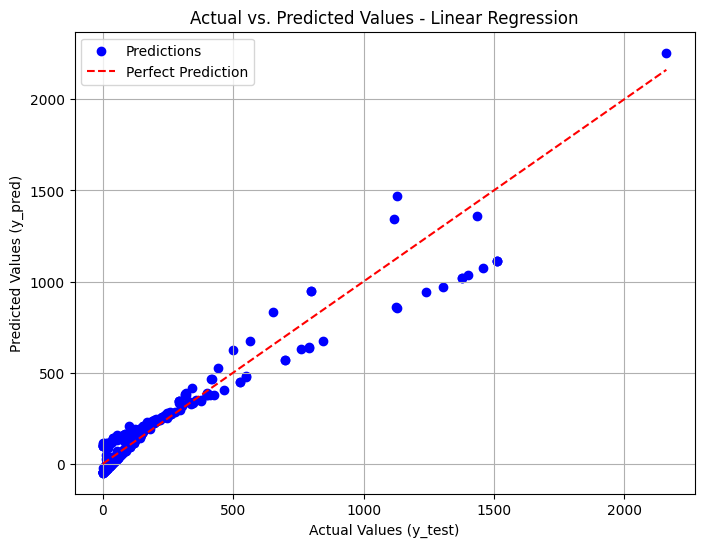

In [37]:
# prompt: plot y_pred and y_test different color with perfect prediction line

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')  # Plot predictions in blue
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction') # Perfect prediction line
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values - Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

## Random Forest

In [29]:
# prompt: random forest

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)  # You can adjust hyperparameters here

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred, squared=False)
rf_mae = mean_absolute_error(y_test, rf_y_pred)

print(f"Random Forest Mean Squared Error (RMSE): {rf_mse}")
print(f"Random Forest Mean Absolute Error (MAE): {rf_mae}")

Random Forest Mean Squared Error (RMSE): 30.641348066825906
Random Forest Mean Absolute Error (MAE): 5.1720857110228335


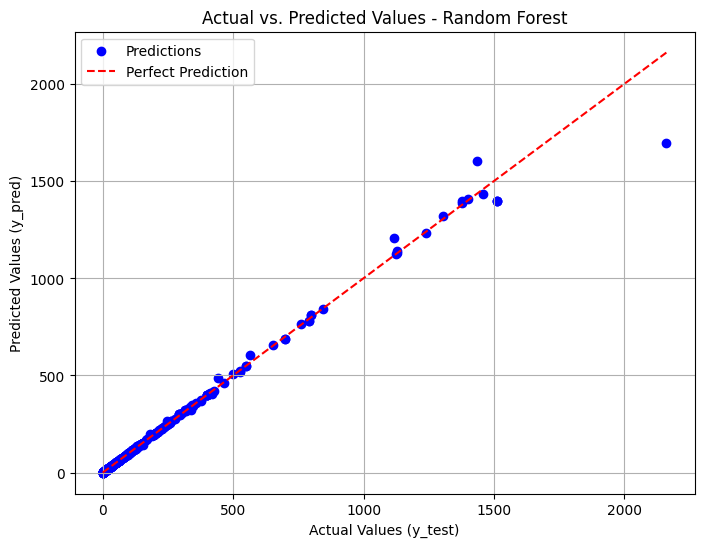

In [36]:
# prompt: plot y_pred and y_test different color with perfect prediction line

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred, color='blue', label='Predictions')  # Plot predictions in blue
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction') # Perfect prediction line
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

## Desicion Tree

In [30]:
# prompt: decision tree

from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters here

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_y_pred, squared=False)
dt_mae = mean_absolute_error(y_test, dt_y_pred)

print(f"Decision Tree Mean Squared Error (RMSE): {dt_mse}")
print(f"Decision Tree Mean Absolute Error (MAE): {dt_mae}")

Decision Tree Mean Squared Error (RMSE): 17.192864215627452
Decision Tree Mean Absolute Error (MAE): 3.477152150634967


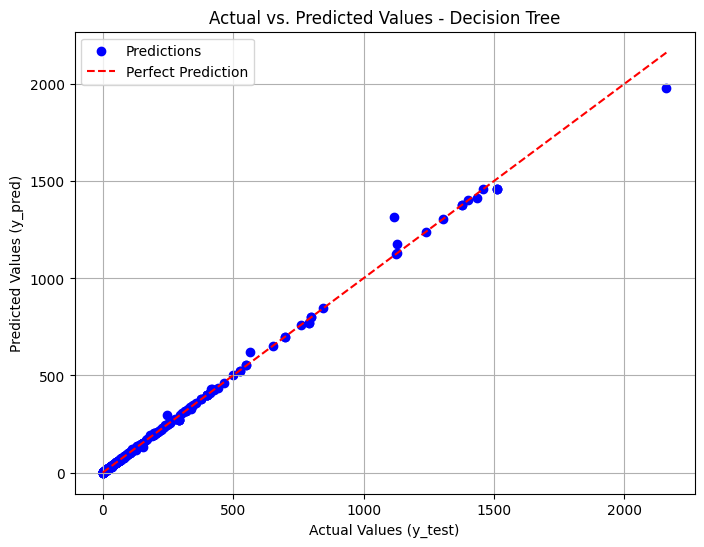

In [38]:
# prompt: plot y_pred and y_test different color with perfect prediction line

plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_y_pred, color='blue', label='Predictions')  # Plot predictions in blue
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction') # Perfect prediction line
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values - Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

## Polynomial Regression

In [31]:
# prompt: Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2) # You can adjust the degree
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train the linear regression model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
y_poly_pred = poly_model.predict(X_test_poly)

# Evaluate the model
poly_mse = mean_squared_error(y_test, y_poly_pred, squared=False)
poly_mae = mean_absolute_error(y_test, y_poly_pred)

print(f"Polynomial Regression Mean Squared Error (RMSE): {poly_mse}")
print(f"Polynomial Regression Mean Absolute Error (MAE): {poly_mae}")

Polynomial Regression Mean Squared Error (RMSE): 13.120147401519834
Polynomial Regression Mean Absolute Error (MAE): 3.2802952480182923


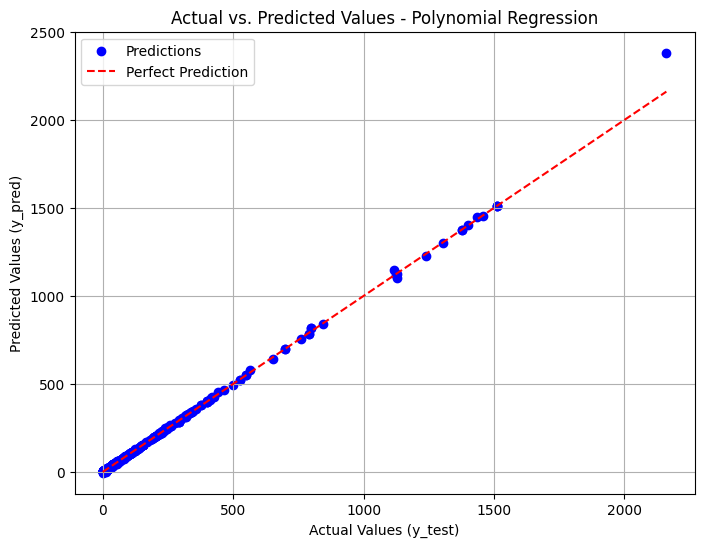

In [39]:
# prompt: plot y_pred and y_test different color with perfect prediction line

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_poly_pred, color='blue', label='Predictions')  # Plot predictions in blue
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction') # Perfect prediction line
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values - Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()